# Grid / pack

## Grid


The ``gf.grid()`` function can take a list (or 2D array) of objects and arrange them along a grid. This is often useful for making parameter sweeps.
If the `separation` argument is true, grid is arranged such that the elements are guaranteed not to touch, with a `spacing` distance between them.
If `separation` is false, elements are spaced evenly along a grid.
The `align_x`/`align_y` arguments specify intra-row/intra-column alignment. 
The `edge_x`/`edge_y` arguments specify inter-row/inter-column alignment (unused if `separation = True`).

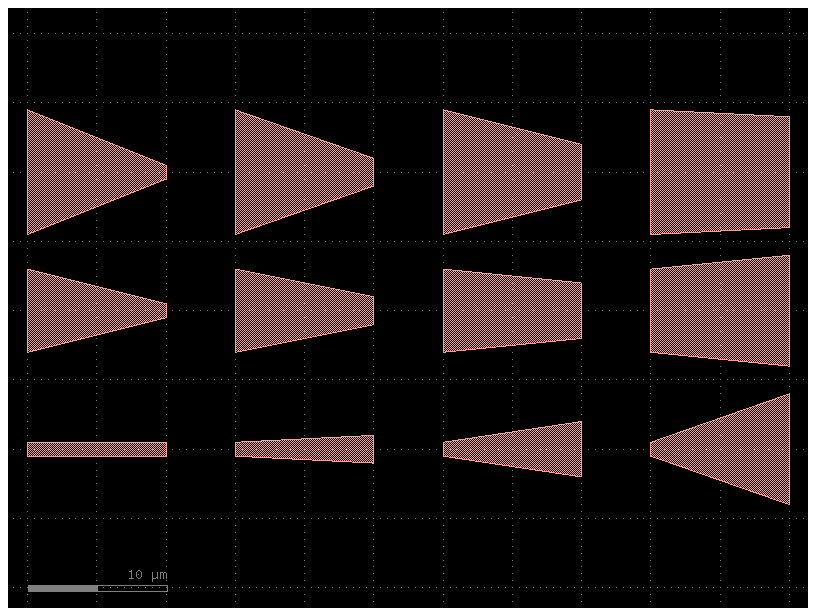

In [1]:
import gdsfactory as gf

components_list = []
for width1 in [1, 6, 9]:
    for width2 in [1, 2, 4, 8]:
        D = gf.components.taper(length=10, width1=width1, width2=width2, layer=(1, 0))
        components_list.append(D)

c = gf.grid(
    tuple(components_list),
    spacing=(5, 1),
    shape=(3, 4),
    align_x="x",
    align_y="y",
)
c.plot()

## Pack


The ``gf.pack()`` function packs geometries together into rectangular bins. If a ``max_size`` is specified, the function will create as many bins as is necessary to pack all the geometries and then return a list of the filled-bin Components.

Here we generate several random shapes then pack them together automatically. We allow the bin to be as large as needed to fit all the Components by specifying ``max_size = (None, None)``.  By setting ``aspect_ratio = (2,1)``, we specify the rectangular bin it tries to pack them into should be twice as wide as it is tall:

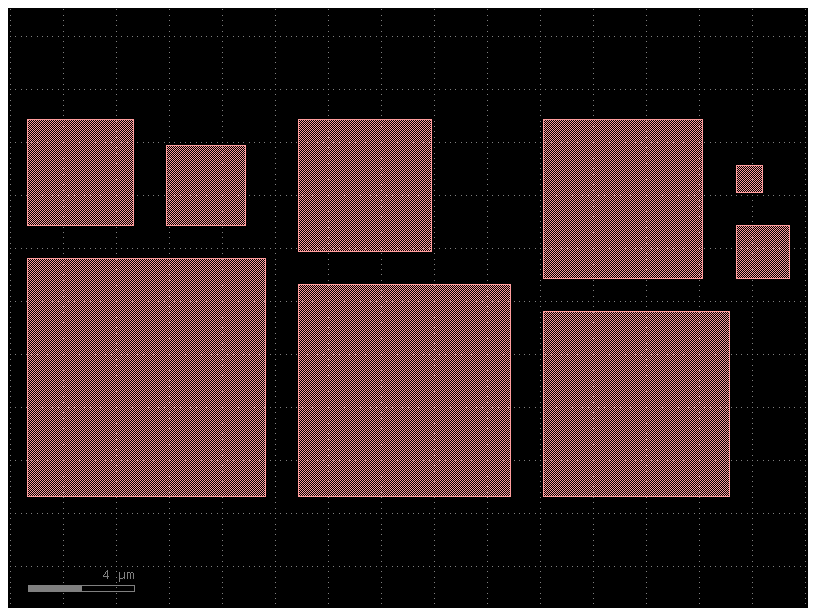

In [2]:
import numpy as np

import gdsfactory as gf

np.random.seed(5)
D_list = [gf.components.rectangle(size=(i, i)) for i in range(1, 10)]

D_packed_list = gf.pack(
    D_list,  # Must be a list or tuple of Components
    spacing=1.25,  # Minimum distance between adjacent shapes
    aspect_ratio=(2, 1),  # (width, height) ratio of the rectangular bin
    max_size=(None, None),  # Limits the size into which the shapes will be packed
    density=1.05,  # Values closer to 1 pack tighter but require more computation
    sort_by_area=True,  # Pre-sorts the shapes by area
)
D = D_packed_list[0]  # Only one bin was created, so we plot that
D.plot()

Say we need to pack many shapes into multiple 500x500 unit die. If we set ``max_size = (500,500)`` the shapes will be packed into as many 500x500 unit die as required to fit them all:

In [3]:
np.random.seed(1)
D_list = [
    gf.components.ellipse(radii=tuple(np.random.rand(2) * n + 2)) for n in range(120)
]
D_packed_list = gf.pack(
    D_list,  # Must be a list or tuple of Components
    spacing=4,  # Minimum distance between adjacent shapes
    aspect_ratio=(1, 1),  # Shape of the box
    max_size=(500, 500),  # Limits the size into which the shapes will be packed
    density=1.05,  # Values closer to 1 pack tighter but require more computation
    sort_by_area=True,  # Pre-sorts the shapes by area
)

print(len(D_packed_list))

4


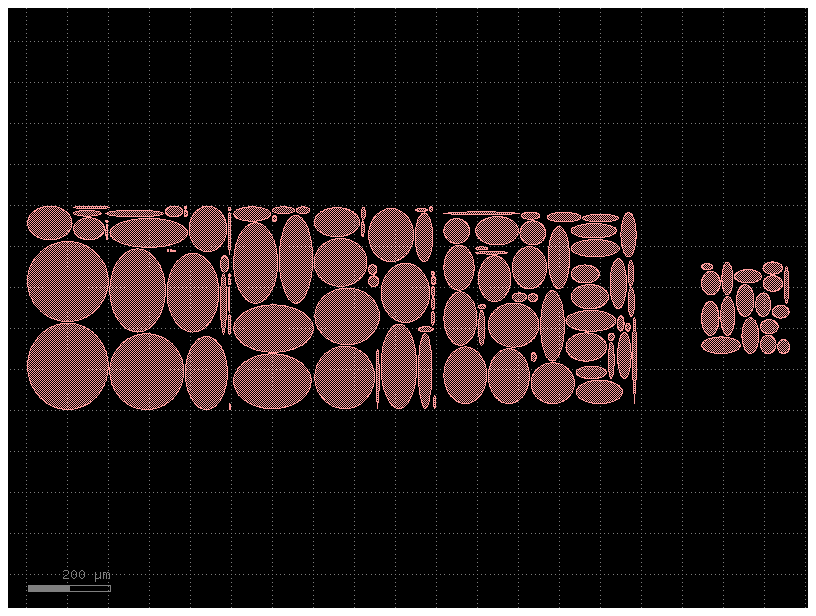

In [4]:
c = gf.grid(D_packed_list)
c

Note that the packing problem is an NP-complete problem, so ``gf.pack()`` may be slow if there are more than a few hundred Components to pack (in that case, try pre-packing a few dozen at a time then packing the resulting bins). 